In [91]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [92]:
df = pd.read_excel("dados/AdventureWorks.xlsx")
pd.set_option('display.max_columns', None)

In [93]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [94]:
#Tamanho do dataset
df.shape

(904, 16)

In [95]:
#Tipo dos dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [96]:
#Qual a receita total
df['Valor Venda'].sum()

np.float64(5984606.1426)

In [97]:
#Qual custo total?
#Criando a coluna custo
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [98]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


In [99]:
#Qual o custo total?
round(df['Custo'].sum(), 2)

np.float64(2486783.05)

In [100]:
#Agora temos a receita e custo e o total, podemos achar o lucro total
#vamos criar uma coluna de lucro que sera a receita - custo
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [101]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [102]:
#Total lucro
round(df['Lucro'].sum(), 2)

np.float64(3497823.09)

In [103]:
#Criando uma coluna com total de dias para enviar o produto
df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']

In [104]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


Agora, queremos a media do tempo de envio para cada marca, e para isso precisamos transformar a coluna Tempo_envio em numerica 

In [105]:
df.dtypes

Data Venda         datetime64[ns]
Data Envio         datetime64[ns]
ID Loja                     int64
ID Produto                  int64
ID Cliente                  int64
No. Venda                  object
Custo Unitário            float64
Preço Unitário            float64
Quantidade                  int64
Valor Desconto            float64
Valor Venda               float64
Produto                    object
Fabricante                 object
Marca                      object
Classe                     object
Cor                        object
Custo                     float64
Lucro                     float64
Tempo_Envio       timedelta64[ns]
dtype: object

In [106]:
#Extraindo apenas os dias
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [107]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [108]:
#Verificando o tipo da coluna tempo_envio 
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
Custo                    float64
Lucro                    float64
Tempo_Envio                int64
dtype: object

In [109]:
#Media do tempo de envio por marca 
df.groupby('Marca')['Tempo_Envio'].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_Envio, dtype: float64

Missing Values

In [110]:
#verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

E se a gente quiser saber o lucro por ano e por marca?

In [111]:
#Vamos agrupar por ano e marca 
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [112]:
#Resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()

In [113]:
#Qual o total de produtos vendidos?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produtos')

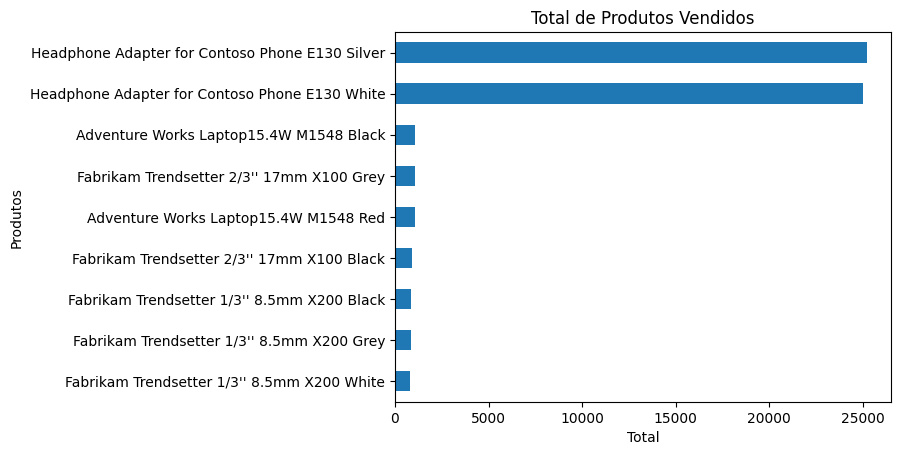

In [122]:
#grafico total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title = 'Total de Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produtos')

Text(0, 0.5, 'Receita')

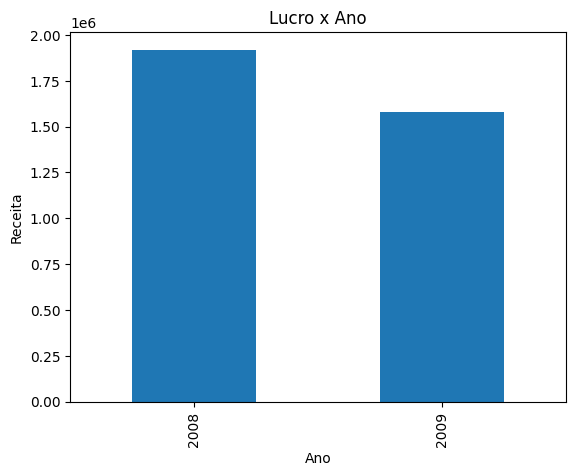

In [123]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title = 'Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita')

In [124]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [125]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [129]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

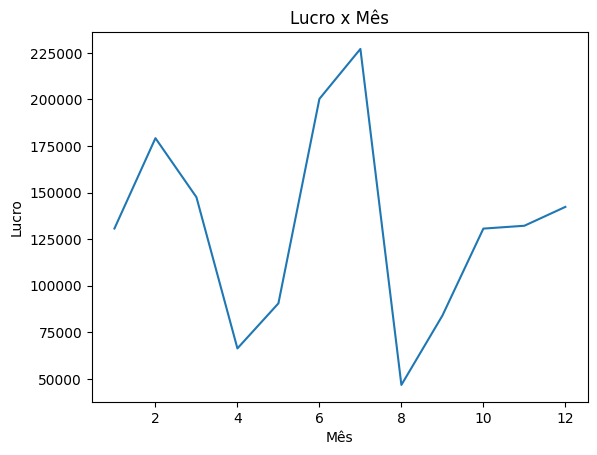

In [130]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title = 'Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

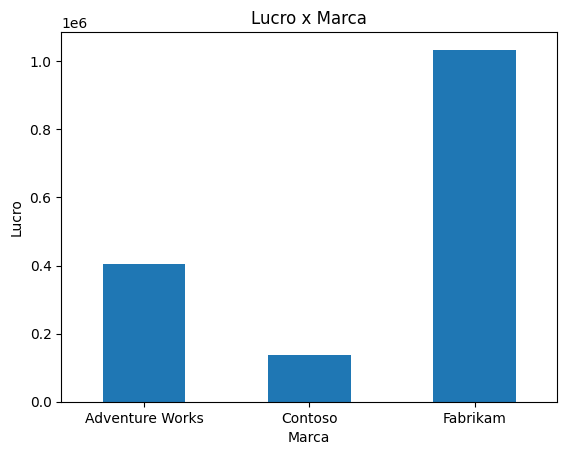

In [134]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title = 'Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation = 'horizontal')

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

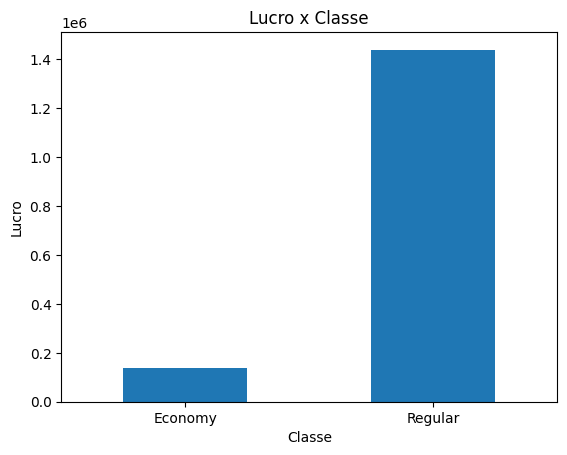

In [137]:
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title = 'Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation = 'horizontal')

In [139]:
df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a145f77170>,
 'caps': [<matplotlib.lines.Line2D at 0x1a145f775c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a145f76cf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a145f77b30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a145f77e00>],
 'means': []}

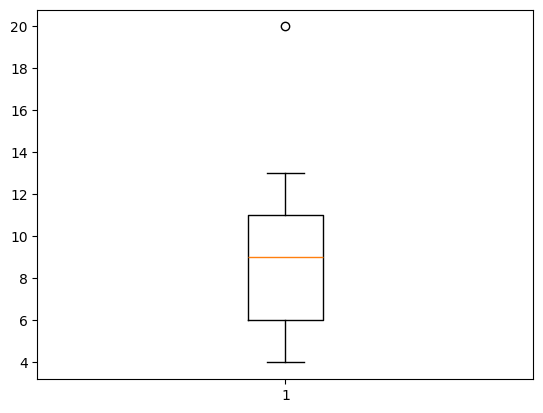

In [140]:
#Boxplot
plt.boxplot(df['Tempo_Envio'])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

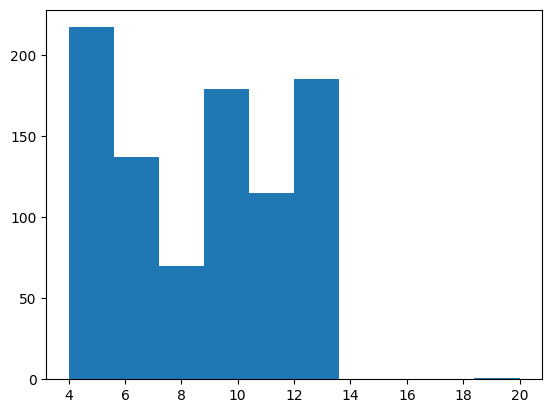

In [141]:
#Histograma
plt.hist(df['Tempo_Envio'])

In [142]:
#Tempo minimo de envio 
df['Tempo_Envio'].min()

np.int64(4)

In [143]:
#Tempo maximo de envio
df['Tempo_Envio'].max()

np.int64(20)

In [144]:
#Identificando outlier
df[df['Tempo_Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [145]:
df.to_csv('df_vendas_novo.csv', index = False)